# Classification on Wine Dataset

Refer to this link for dataset and the details of the features: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

# Import the key libraries

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline


# Merging the datasets
- Combine red and white wine dataset

In [6]:
red = pd.read_csv('winequality-red.csv')
white = pd.read_csv('winequality-white.csv', delimiter=';')
#create new columns named target with 1 which represents red wine 
red['target']=1

In [7]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [8]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
target                  1599 non-null int64
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [9]:
white['target']= 0
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [10]:
white.info() #there is significantly more data points in the white wine dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
target                  4898 non-null int64
dtypes: float64(11), int64(2)
memory usage: 497.5 KB


In [11]:
print('wine quality red:' , white.columns, '\n\n')
print('wine quality white:', red.columns)

wine quality red: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'target'],
      dtype='object') 


wine quality white: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'target'],
      dtype='object')


In [12]:
#as both tables have the same features
#we can merge the 2 datasets with append 
wine =pd.concat([red,white],axis =0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [13]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
target                  6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


# 1.Handling Missing values

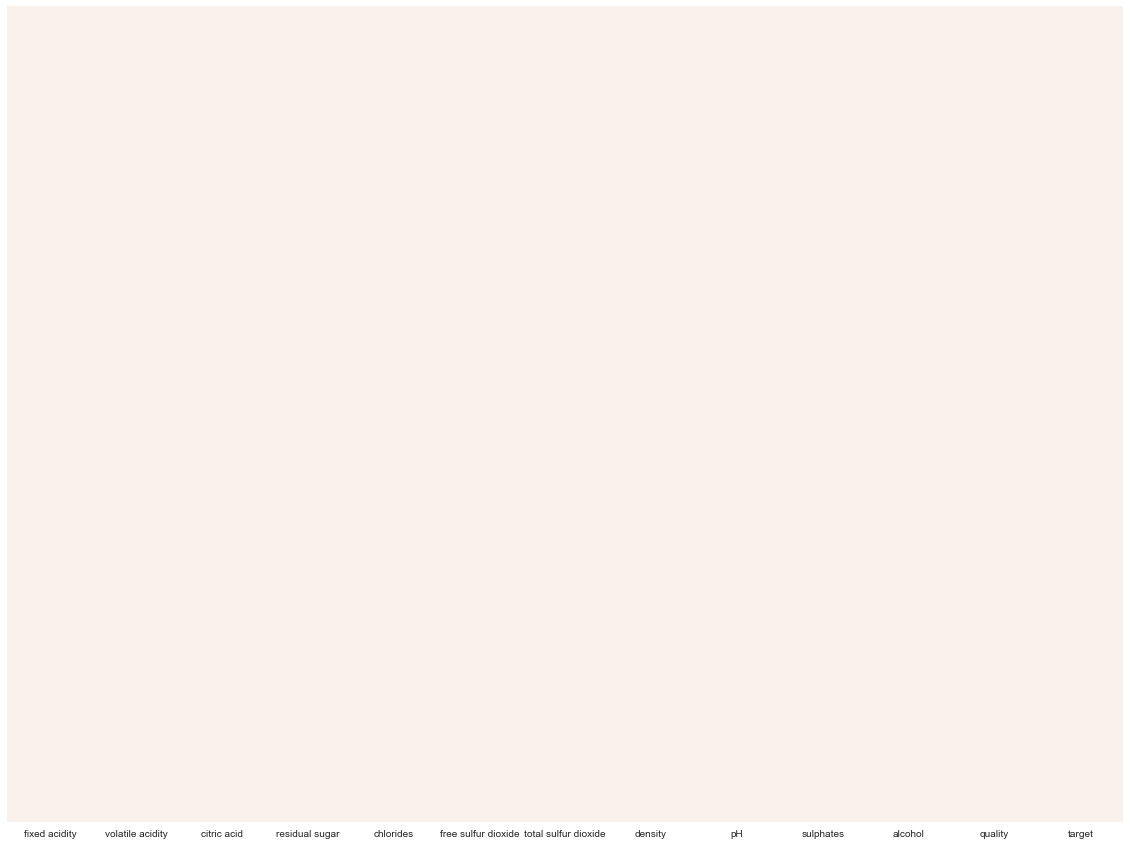

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(wine.isnull(),yticklabels= False, cbar= False)


* Noticed that there are no missing data

# 2.Exploratory Data Analysis

## Distribution of the target

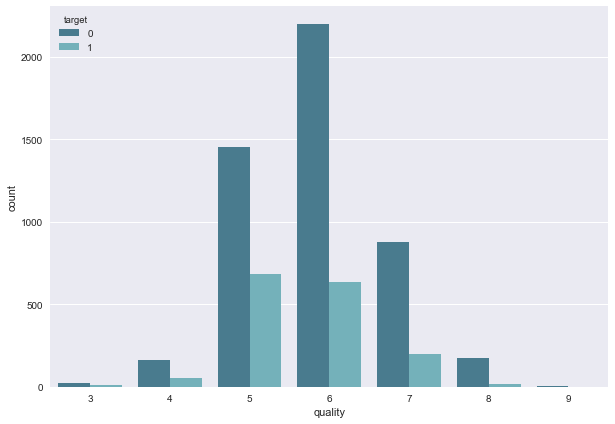

In [15]:
plt.figure(figsize=(10,7))
sns.countplot(wine['quality'], hue =wine['target'], palette = "GnBu_d" ) 
#0 stands for white wine 
#1 stands for red wine 
#the targets are quite normally distributed 

In [17]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'target'],
      dtype='object')

# Correlation

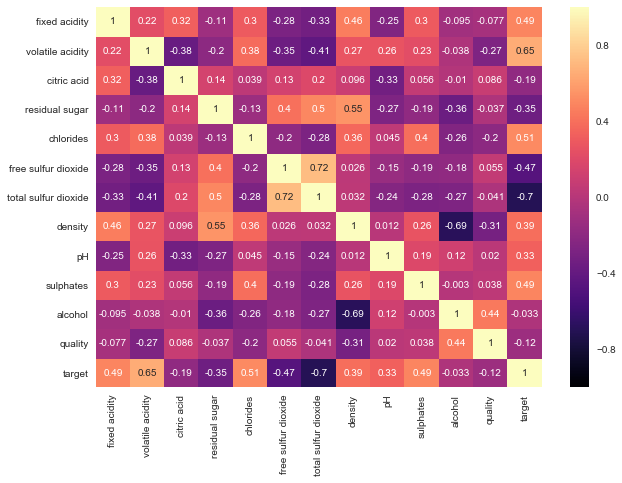

In [41]:
plt.figure(figsize=(10,7))
wine_corrmatrix = wine.corr()
sns.heatmap(wine_corrmatrix , annot = True, cmap = 'magma')

## Insights from the correlation map:
### features that highly predicts the target: 
* volatile acidity 
* chlorides 

# Scatter plot on key features 

<Figure size 720x504 with 0 Axes>

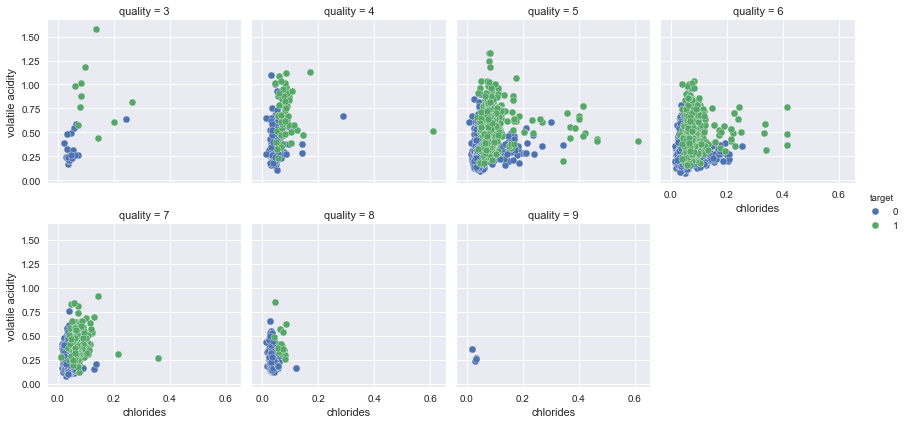

In [42]:
plt.figure(figsize=(10,7))
g = sns.FacetGrid(wine, col="quality",  hue="target",col_wrap=4)
g = (g.map(plt.scatter, "chlorides", "volatile acidity", edgecolor="w").add_legend())


### Insight: 
* Higher quality wines generally have lower level of chlorides and lower level of volatile acidity 

# Train the dataset with KNN

## Validation Method

In [11]:
from sklearn.neighbors import KNeighborsClassifier 
y= wine['target']
X =wine.drop('target',axis =1 )

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
classifier = KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p =2 )
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

### Model Evaluation

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cr)
print(cm)

             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1588
          1       0.92      0.84      0.88       557

avg / total       0.94      0.94      0.94      2145

[[1548   40]
 [  90  467]]


In [15]:
#Accuracy = (TP +TN)/TOTAL 
Accuracy =(1548+467)/(1548+467+40+90)
Incorrect_predictions = 90+40
Accuracy

0.9393939393939394

## Cross Validation

In [16]:
from sklearn.model_selection import cross_val_score, cross_val_predict
classifier_cv = KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p =2 )
cv_results = cross_val_score(classifier_cv, X_test, y_test, cv =10) 
cv_results #for train score for each of the folds

array([ 0.90697674,  0.93953488,  0.95348837,  0.94883721,  0.92093023,
        0.93023256,  0.91627907,  0.92990654,  0.92957746,  0.9342723 ])

In [17]:
#cv score from training 
np.mean(cv_results)

0.93100353770817335

In [18]:
#predict on X_test
cv_predict = cross_val_predict(classifier_cv,X_test,y_test,cv =10)

In [19]:
#classfication report
cr = classification_report(y_test, cv_predict)
print(cr)

             precision    recall  f1-score   support

          0       0.94      0.97      0.95      1588
          1       0.90      0.83      0.86       557

avg / total       0.93      0.93      0.93      2145



# Cross validation + Grid Search 
* Hyperparameter tuning: Use grid search to find the best k
* Essential to use cross validation, using train test split alone will risk overfitting the hyperparameter to the test set

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X,y)


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [21]:
knn_cv.best_params_

{'n_neighbors': 5}

In [22]:
knn_cv.best_score_

0.93797137140218567

# Finding the optimal neighbours by plot

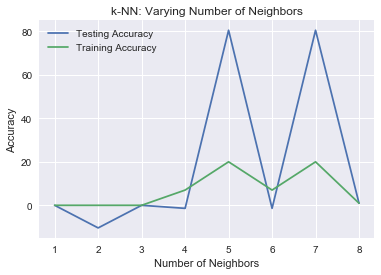

In [25]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    knn1 = KNeighborsClassifier(n_neighbors = k)# Setup a k-NN Classifier with k neighbors: knn

# Fit the classifier to the training data
knn1.fit(X_train, y_train)
    
#Compute accuracy on the training set
train_accuracy[i] = knn1.score(X_train, y_train)

#Compute accuracy on the testing set
test_accuracy[i] = knn1.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
